# Быстрый старт в анализ данных

Выполнил: Слащинин Сергей, 17ИАД-МАГ

# Определение кредитоспособности клиента

В данном датасете представлена информация по клиентам (все для всех параметров названия заменены для защиты конфиденциальности).
Каждый клиент имеет метку - 0 или 1, обозначающую его кредитоспособность. 1 - клиент сможет выплатить кредит, 0 - наоборот
## Задача
По имеющемуся набору параметров (14 различных параметров) для каждого клиента предсказать его кредитоспособность

## Данные 
https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29

## Description of the dataset

THIS CREDIT DATA ORIGINATES FROM QUINLAN (see below).   

1. Title: Australian Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  **All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.**
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 14 + class attribute

7.  Attribute Information:   THERE ARE 6 NUMERICAL AND 8 CATEGORICAL ATTRIBUTES. 
                             THE LABELS HAVE BEEN CHANGED FOR THE CONVENIENCE
                             OF THE STATISTICAL ALGORITHMS.   FOR EXAMPLE,
                             ATTRIBUTE 4 ORIGINALLY HAD 3 LABELS p,g,gg AND
                             THESE HAVE BEEN CHANGED TO LABELS 1,2,3.                             

    A1:	0,1    CATEGORICAL
        a,b
    A2:	continuous.
    A3:	continuous.
    A4:	1,2,3         CATEGORICAL
        p,g,gg
    A5:  1, 2,3,4,5, 6,7,8,9,10,11,12,13,14    CATEGORICAL
         ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x 
         
    A6:	 1, 2,3, 4,5,6,7,8,9    CATEGORICAL
        ff,dd,j,bb,v,n,o,h,z 

    A7:	continuous.
    A8:	1, 0       CATEGORICAL
        t, f.
    A9: 1, 0	    CATEGORICAL
        t, f.
    A10:	continuous.
    A11:  1, 0	    CATEGORICAL
          t, f.
    A12:    1, 2, 3    CATEGORICAL
            s, g, p 
    A13:	continuous.
    
    A14:	continuous.
    
    A15:   0,1
           -,+        (class attribute)
          
    Class 1 indicates clients with approved credits
            
8.  Missing Attribute Values:
    37 cases (5%) HAD one or more missing values.  The missing
    values from particular attributes WERE:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13
    
    THESE WERE REPLACED BY THE MODE OF THE ATTRIBUTE (CATEGORICAL)
                               MEAN OF THE ATTRIBUTE (CONTINUOUS)
                           
9.  Class Distribution
  
    +: 307 (44.5%)    CLASS 1
    -: 383 (55.5%)    CLASS 0


10.  There is no cost matrix.


## Загрузим необходимые библиотеки и считаем данные из файла

In [376]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [377]:
data = pd.read_csv('australian.dat', sep = ', ', engine = 'python')

In [378]:
data.index

RangeIndex(start=0, stop=690, step=1)

In [379]:
print(data.shape)
print(data.columns)

(690, 15)
Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'class'],
      dtype='object')


In [380]:
data.index

RangeIndex(start=0, stop=690, step=1)

## Характеристики признаков

In [381]:
data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


## Попробуем визуализировать зависимости признаков

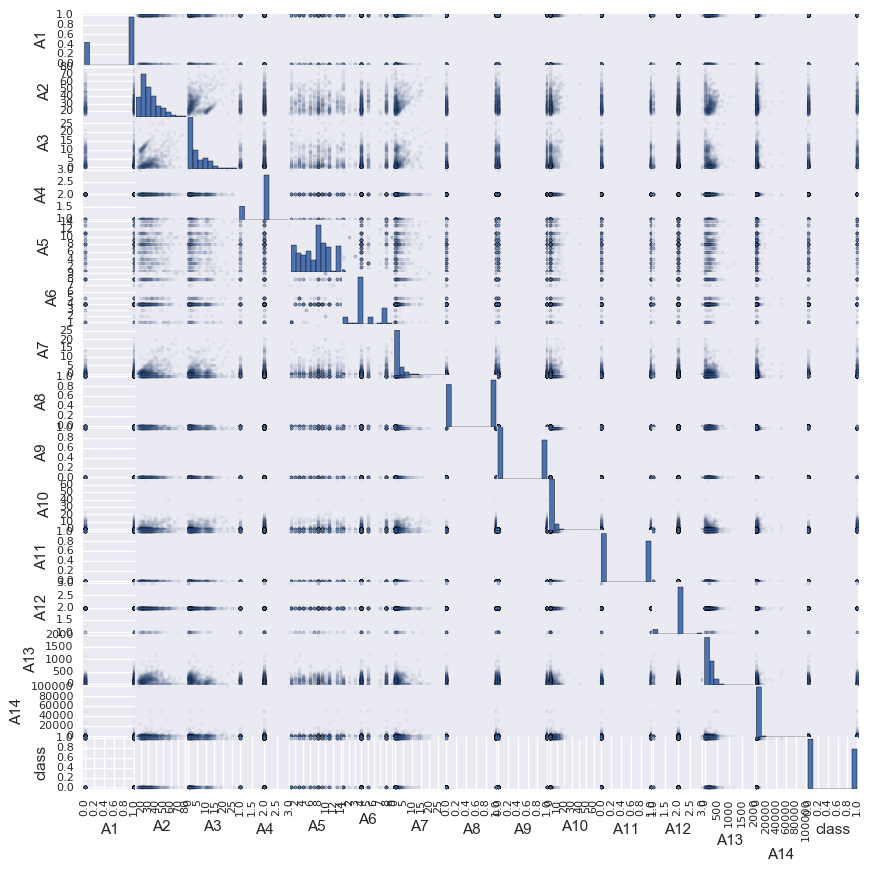

In [382]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .05, figsize = (10, 10))
pass

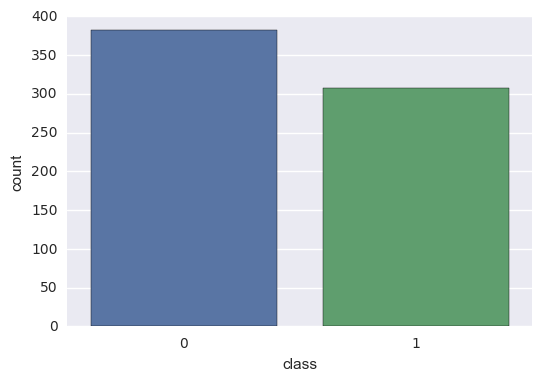

In [383]:
sns.countplot(data['class']);

## Найдем выборочную ковариационную матрицу

In [384]:
correlations = data.corr()
correlations

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
A1,1.000000,0.036659,-0.028166,-0.063528,-0.005321,0.052658,0.097009,0.000918,-0.063256,-0.008427,0.053984,-0.059901,0.058595,0.003616,-0.013897
A2,0.036659,1.000000,0.201315,0.089503,-0.093877,0.028510,0.392788,0.204342,0.083680,0.185574,0.054779,0.020703,-0.077159,0.018539,0.161626
A3,-0.028166,0.201315,1.000000,0.091526,0.027665,0.094504,0.298902,0.244317,0.174846,0.271207,-0.013023,0.093752,-0.222346,0.123121,0.206294
A4,-0.063528,0.089503,0.091526,1.000000,0.088846,0.046639,0.080624,0.129863,0.162464,0.106457,0.004964,0.006400,-0.001758,0.120065,0.194306
A5,-0.005321,-0.093877,0.027665,0.088846,1.000000,0.402284,0.144757,0.311833,0.222957,0.150166,0.024738,0.070222,0.088140,0.030735,0.373712
A6,0.052658,0.028510,0.094504,0.046639,0.402284,1.000000,0.240400,0.246193,0.080397,0.098841,0.093641,0.036435,0.070662,0.064841,0.246567
A7,0.097009,0.392788,0.298902,0.080624,0.144757,0.240400,1.000000,0.345689,0.222982,0.322330,0.138139,-0.016297,-0.076389,0.051345,0.322475
A8,0.000918,0.204342,0.244317,0.129863,0.311833,0.246193,0.345689,1.000000,0.432032,0.379532,0.091276,0.045054,-0.067387,0.090012,0.720407
A9,-0.063256,0.083680,0.174846,0.162464,0.222957,0.080397,0.222982,0.432032,1.000000,0.571498,0.017043,0.176097,-0.053321,0.077652,0.458301
A10,-0.008427,0.185574,0.271207,0.106457,0.150166,0.098841,0.322330,0.379532,0.571498,1.000000,0.006944,0.101479,-0.119808,0.063692,0.406410


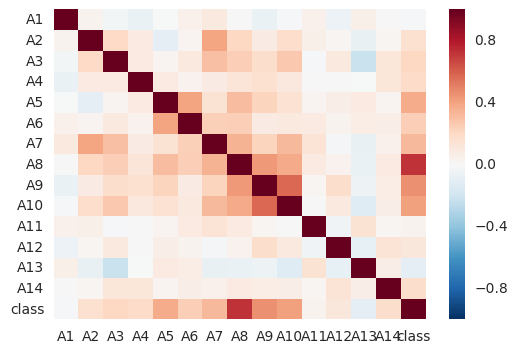

In [385]:
sns.heatmap(correlations, 
            xticklabels=correlations.columns.values,
            yticklabels=correlations.columns.values)

### **Как видно из матрицы (и heatmap для нее), наибольшее значение на определение кредитоспособности клиента, скорее всего, имеют параметры A5, A8, A9, A10 (корреляции больше 0.35).** Попробуем визуализировать зависимости между этими признаками и кредитоспособностью клиента

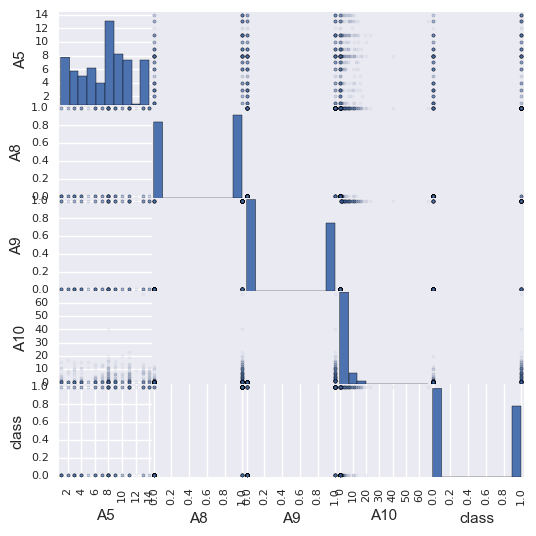

In [386]:
sub_data = data[["A5","A8","A9","A10","class"]]
scatter_matrix(sub_data, alpha = .05, figsize = (6, 6))
pass

In [387]:
sub_data.corr()

,A5,A8,A9,A10,class
A5,1.000000,0.311833,0.222957,0.150166,0.373712
A8,0.311833,1.000000,0.432032,0.379532,0.720407
A9,0.222957,0.432032,1.000000,0.571498,0.458301
A10,0.150166,0.379532,0.571498,1.000000,0.406410
class,0.373712,0.720407,0.458301,0.406410,1.000000


### **Можно заметить, что по одному бинарному параметру А8 можно с вероятностью 0.855 верно предсказать кредитоспособность клиента, а по одному параметру А9  - с вероянтостью 0.733. Однако большинство ошибок (77 из 100) это ошибки 1го рода (false_positives), т.е. выдача кредита некредитоспособным клиентам (такие ошибки более вредны для банков, т.к. могут привести к серьезным финансовым потерям) **

In [388]:
data_class = data["class"]
a8_predict = data['A8']
a9_predict = data['A9']
print(len(a8_predict))
print(len(a9_predict))
err_A8 = np.mean(data_class != a8_predict)
err_A9 = np.mean(data_class != a9_predict)

print(err_A8, err_A9)
print(1 - err_A8,1 - err_A9)

690
690
0.144927536232 0.266666666667
0.855072463768 0.733333333333


In [389]:
confusion_matrix(data_class, a8_predict)

array([[306,  77],
       [ 23, 284]])

## Задача


# Готовим данные

Итак, разделим оставшиеся переменные на качественные и количественные.

In [390]:
data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'class'],
      dtype='object')

In [391]:
categorical_columns = ['A1','A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12', 'class']
numerical_columns   = ['A2', 'A3', 'A7', 'A10', 'A13', 'A14']
print(categorical_columns)
print(numerical_columns)

['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12', 'class']
['A2', 'A3', 'A7', 'A10', 'A13', 'A14']


In [392]:
for c in categorical_columns:
    print(c, data[c].unique())

A1 [1 0]
A4 [2 1 3]
A5 [ 4  8  5  6  3 11  2 14  9 13  7  1 10 12]
A6 [4 3 8 1 5 9 2 7]
A8 [0 1]
A9 [0 1]
A11 [1 0]
A12 [2 1 3]
class [0 1]


In [393]:
data[numerical_columns].count(axis = 0)

A2     690
A3     690
A7     690
A10    690
A13    690
A14    690
dtype: int64

In [394]:
data_describe = data.describe()
data[categorical_columns].count(axis = 0)

A1       690
A4       690
A5       690
A6       690
A8       690
A9       690
A11      690
A12      690
class    690
dtype: int64

In [395]:
data['A4'].unique()

array([2, 1, 3], dtype=int64)

In [396]:
data_describe

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


## Векторизация

Нужно что-то сделать с категориальными (номинальными) признаками

In [397]:
binary_columns    = [c for c in categorical_columns if len(data[c].unique()) == 2]
nonbinary_columns = [c for c in categorical_columns if len(data[c].unique()) > 2]
print(binary_columns, nonbinary_columns)

['A1', 'A8', 'A9', 'A11', 'class'] ['A4', 'A5', 'A6', 'A12']


In [398]:
data = data.astype(object)

К небинарными признакам применим метод _векторизации_, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

Например, в нашей задаче признак `race` принимает 5 различных значений: 

In [399]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['A4_1', 'A4_2', 'A4_3', 'A5_1', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6',
       'A5_7', 'A5_8', 'A5_9', 'A5_10', 'A5_11', 'A5_12', 'A5_13', 'A5_14',
       'A6_1', 'A6_2', 'A6_3', 'A6_4', 'A6_5', 'A6_7', 'A6_8', 'A6_9', 'A12_1',
       'A12_2', 'A12_3'],
      dtype='object')


In [400]:
data_nonbinary = data_nonbinary.astype('int64')


## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [401]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,A2,A3,A7,A10,A13,A14
count,690.00,690.0,690.0,690,690,690
unique,350.00,215.0,132.0,23,171,240
top,31.57,1.5,0.0,0,0,1
freq,12.00,21.0,70.0,395,132,295


In [402]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [403]:
data_numerical=data_numerical.astype('float64')

In [404]:
data_numerical.describe()

,A2,A3,A7,A10,A13,A14
count,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02
mean,7.024333e-15,3.472263e-16,5.127943e-16,1.444899e-16,1.866462e-17,5.084500e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.503231e+00,-9.559198e-01,-6.643947e-01,-4.935286e-01,-1.068862e+00,-1.952717e-01
25%,-7.506959e-01,-7.550425e-01,-6.150897e-01,-4.935286e-01,-6.041760e-01,-1.952717e-01
50%,-2.483030e-01,-4.035072e-01,-3.655762e-01,-4.935286e-01,-1.394900e-01,-1.943120e-01
75%,5.179411e-01,4.919034e-01,1.200038e-01,1.233822e-01,5.110704e-01,-1.193615e-01
max,4.107034e+00,4.668645e+00,7.851932e+00,1.328414e+01,1.054829e+01,1.899821e+01


## Соединяем все в одну таблицу

In [405]:
data[binary_columns] = data[binary_columns].astype('int64')

In [406]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
#print data.columns

(690, 39)


In [407]:
data.describe()

,A2,A3,A7,A10,A13,A14,A4_1,A4_2,A4_3,A5_1,A5_2,A5_3,A5_4,A5_5,A5_6,A5_7,A5_8,A5_9,A5_10,A5_11,A5_12,A5_13,A5_14,A6_1,A6_2,A6_3,A6_4,A6_5,A6_7,A6_8,A6_9,A12_1,A12_2,A12_3,A1,A8,A9,A11,class
count,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,7.024333e-15,3.472263e-16,5.127943e-16,1.444899e-16,1.866462e-17,5.084500e-17,0.236232,0.760870,0.002899,0.076812,0.043478,0.085507,0.073913,0.014493,0.078261,0.055072,0.211594,0.092754,0.036232,0.113043,0.004348,0.059420,0.055072,0.082609,0.008696,0.011594,0.591304,0.085507,0.008696,0.20000,0.011594,0.082609,0.905797,0.011594,0.678261,0.523188,0.427536,0.457971,0.444928
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.425074,0.426862,0.053799,0.266485,0.204079,0.279838,0.261819,0.119597,0.268776,0.228287,0.408735,0.290297,0.187002,0.316876,0.065842,0.236581,0.228287,0.275490,0.092912,0.107128,0.491949,0.279838,0.092912,0.40029,0.107128,0.275490,0.292323,0.107128,0.467482,0.499824,0.495080,0.498592,0.497318
min,-1.503231e+00,-9.559198e-01,-6.643947e-01,-4.935286e-01,-1.068862e+00,-1.952717e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.506959e-01,-7.550425e-01,-6.150897e-01,-4.935286e-01,-6.041760e-01,-1.952717e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.483030e-01,-4.035072e-01,-3.655762e-01,-4.935286e-01,-1.394900e-01,-1.943120e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,5.179411e-01,4.919034e-01,1.200038e-01,1.233822e-01,5.110704e-01,-1.193615e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,4.107034e+00,4.668645e+00,7.851932e+00,1.328414e+01,1.054829e+01,1.899821e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y

In [408]:
X = data.drop(('class'), axis = 1) # выбрасываем столбец 'class'
y = data['class']
feature_names = X.columns


In [409]:
type(feature_names)

pandas.indexes.base.Index

In [410]:
feature_names

Index(['A2', 'A3', 'A7', 'A10', 'A13', 'A14', 'A4_1', 'A4_2', 'A4_3', 'A5_1',
       'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7', 'A5_8', 'A5_9', 'A5_10',
       'A5_11', 'A5_12', 'A5_13', 'A5_14', 'A6_1', 'A6_2', 'A6_3', 'A6_4',
       'A6_5', 'A6_7', 'A6_8', 'A6_9', 'A12_1', 'A12_2', 'A12_3', 'A1', 'A8',
       'A9', 'A11'],
      dtype='object')

In [411]:
print(X.shape)
print(y.shape)
N, d = X.shape

(690, 38)
(690,)


In [412]:
from sklearn.cross_validation import train_test_split, cross_val_score, StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

483 207


# $k$NN

In [413]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [414]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.140786749482 0.178743961353


In [415]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [416]:
err_test

0.17874396135265702

In [417]:
print(confusion_matrix(y_test, y_test_predict))

[[107   8]
 [ 29  63]]


### Вывод: для метода 10 ближайших соседей мы получили ошибку большую, чем при угадывании класса с помощью лишь 1 параметра А8, однако большинство ошибок - ошибки 2го рода (false negatives), которые менее опасны для банка

### Подбор параметров

In [418]:
err_train = list()
err_test = list()
from sklearn.grid_search import GridSearchCV
nnb = list(range(1, 60))
knn = KNeighborsClassifier()

#cva = StratifiedKFold(y, 10, True, 13)
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X, y)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)
err_cv = list(map(lambda x: 1 - x[1], grid.grid_scores_))
for k in nnb:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred      = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    err_train.append(np.mean(y_train != y_pred))
    err_test.append(np.mean(y_test != y_test_pred))

0.165217391304 13


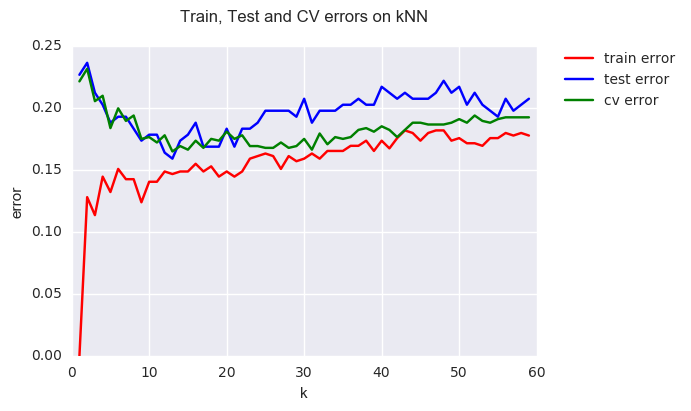

In [419]:

plt.title('Train, Test and CV errors on kNN\n')
plt.plot(nnb, err_train, 'r', label = "train error")
plt.plot(nnb, err_test, 'b', label = "test error")
plt.plot(nnb, err_cv, 'g', label = "cv error")
plt.xlabel('k')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### После подбора параметров лучший параметр для числа соседей это k=13. При k < 10 имеет место переобучение

In [420]:
knn = KNeighborsClassifier(n_neighbors = 13).fit(X_train, y_train)
y_test_predict = knn.predict(X_test);
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
y_predict = knn.predict(X)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.146997929607 0.159420289855
[[105  10]
 [ 23  69]]
0.150724637681
[[354  29]
 [ 75 232]]


### Вывод: после подбора параметров мы уменьшили среднюю вероятность ошибки, но увеличили число ошибок первого рода. При этом не удалось достичь результата для "примитивной" классификации с помощью параметра А8, где ошибка меньше

# Логистическая регрессия

In [421]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=400)
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=400, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [422]:
y_train_predict = logistic_model.predict(X_train)
y_test_predict = logistic_model.predict(X_test)
y_predict = logistic_model.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.124223602484 0.144927536232
[[100  15]
 [ 15  77]]
0.130434782609
[[335  48]
 [ 42 265]]


### Мы смогли достигнуть лучшего среднего уровня ошибки, чем для "примитивного" классификатора(по параметру А8), а также уменьшить относительно него число ошибок первого рода.

## Изменим параметры модели

In [423]:
logistic_model = LogisticRegression(max_iter=400, C=2)
logistic_model.fit(X_train, y_train)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=400, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [424]:
y_train_predict = logistic_model.predict(X_train)
y_test_predict = logistic_model.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.124223602484 0.144927536232


In [425]:
reg_coef = np.linspace(start=0.05, stop = 2.5, num = 50)
grid = GridSearchCV(logistic_model, param_grid = {'C':reg_coef}, cv=10)
grid.fit(X, y)
err_train = list()
err_test = list()
best_solver = 'liblinear'
best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)
err_cv = list(map(lambda x: 1 - x[1], grid.grid_scores_))
for c in reg_coef:
    logistic_model = LogisticRegression(max_iter=400, C = c, solver = best_solver)
    logistic_model.fit(X_train, y_train)
    y_train_pred      = logistic_model.predict(X_train)
    y_test_pred = logistic_model.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))

0.14347826087 0.8


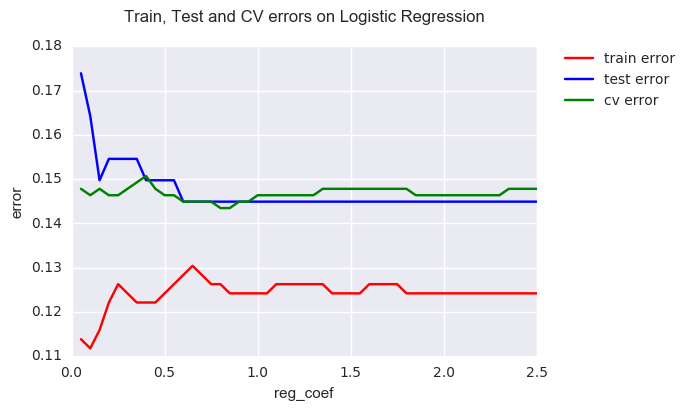

In [426]:
plt.title('Train, Test and CV errors on Logistic Regression\n')
plt.plot(reg_coef, err_train, 'r', label = "train error")
plt.plot(reg_coef, err_test, 'b', label = "test error")
plt.plot(reg_coef, err_cv, 'g', label = "cv error")
plt.xlabel('reg_coef')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [427]:
logistic_model = LogisticRegression(max_iter=400, C=best_C, solver = best_solver)
logistic_model.fit(X_train, y_train)

LogisticRegression(C=0.80000000000000004, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=400,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [428]:
y_train_predict = logistic_model.predict(X_train)
y_test_predict = logistic_model.predict(X_test)
y_predict = logistic_model.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.126293995859 0.144927536232
[[100  15]
 [ 15  77]]
0.131884057971
[[335  48]
 [ 43 264]]


### Вывод: логистическая регрессия для данной задачи работает лучше, чем метод ближайших соседей и "примитивный" классификатор. Подбор параметра регуляризации дал положительные результаты (немного уменьшилась ошибка на глобальной выборке)

# LDA

In [429]:
from sklearn import discriminant_analysis
import warnings 
warnings.filterwarnings('always')
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [494]:
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

y_train_predict = lda_model.predict(X_train)
y_test_predict = lda_model.predict(X_test)
y_predict = lda_model.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.136645962733 0.130434782609
[[95 20]
 [ 7 85]]
0.134782608696
[[313  70]
 [ 23 284]]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### LDA работает лучше линейной регрессии на тестовой выборке, но хуже на глобальной

In [431]:
pd.set_option('display.max_columns', None)

np.abs(X_train.corr()) > 0.7

,A2,A3,A7,A10,A13,A14,A4_1,A4_2,A4_3,A5_1,A5_2,A5_3,A5_4,A5_5,A5_6,A5_7,A5_8,A5_9,A5_10,A5_11,A5_12,A5_13,A5_14,A6_1,A6_2,A6_3,A6_4,A6_5,A6_7,A6_8,A6_9,A12_1,A12_2,A12_3,A1,A8,A9,A11
A2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A7,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A10,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
A13,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A14,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A4_1,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A4_2,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A4_3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A5_1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


C:\Program Files\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Program Files\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


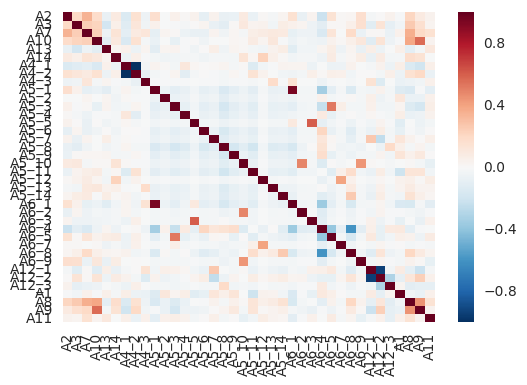

In [432]:
corrs = X_train.corr()
sns.heatmap(corrs, 
            xticklabels=corrs.columns.values,
            yticklabels=corrs.columns.values)

### Уберем сильно коррелирующие столбцы

In [489]:
def del_corr(dataset, dataset2, dataset3, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    print
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset  
                    del dataset2[colname]
                    del dataset3[colname]
X_train_new = X_train.copy()
X_test_new = X_test.copy()
X_new = X.copy()
del_corr(X_train_new, X_test_new,X_new,  0.8)
print(X_train_new.shape)
print(X_test_new.shape)


(483, 35)
(207, 35)


C:\Program Files\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Program Files\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


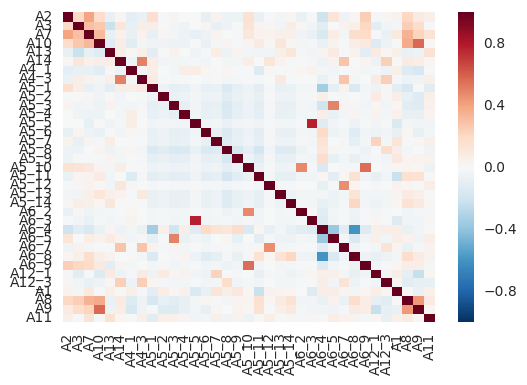

In [490]:
corrs = X_new.corr()
sns.heatmap(corrs, 
            xticklabels=corrs.columns.values,
            yticklabels=corrs.columns.values)

In [493]:
lda_model = discriminant_analysis.LinearDiscriminantAnalysis(solver = 'svd')
lda_model.fit(X_train_new, y_train)
y_train_predict = lda_model.predict(X_train_new)
y_test_predict = lda_model.predict(X_test_new)
y_predict = lda_model.predict(X_new)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.136645962733 0.130434782609
[[95 20]
 [ 7 85]]
0.134782608696
[[313  70]
 [ 23 284]]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### Вывод: удаление сильно коррелирующих столбцов не дало положительных результатов, на глобальной выборке метод работет хуже линейной регрессии

# QDA

In [503]:
from sklearn import discriminant_analysis
warnings.filterwarnings("ignore")
qda_model = discriminant_analysis.QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
y_train_predict = qda_model.predict(X_train)
y_test_predict = qda_model.predict(X_test)
y_predict = qda_model.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.320910973085 0.309178743961
[[112   3]
 [ 61  31]]
0.317391304348
[[377   6]
 [213  94]]


### По сравнению с предыдущими методами - гораздо большая вероятность ошибки (большинство - ошибки 2го рода)

In [512]:

reg_param = np.linspace(start=0.01, stop = 1.0, num = 100)
grid = GridSearchCV(qda_model, param_grid = {'reg_param': reg_param}, cv=10)
grid.fit(X, y)
err_train = list()
err_test = list()
best_cv_err = 1 - grid.best_score_
best_reg_param = grid.best_estimator_.reg_param
print(best_cv_err, best_reg_param)
err_cv = list(map(lambda x: 1 - x[1], grid.grid_scores_))
for c in reg_param:
    qda_model = discriminant_analysis.QuadraticDiscriminantAnalysis(reg_param = c)
    qda_model.fit(X_train, y_train)
    y_train_pred      = qda_model.predict(X_train)
    y_test_pred = qda_model.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))

0.179710144928 0.03


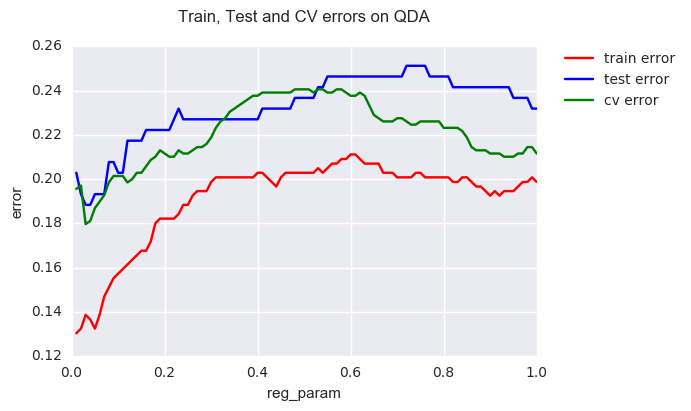

In [513]:
plt.title('Train, Test and CV errors on QDA\n')
plt.plot(reg_param, err_train, 'r', label = "train error")
plt.plot(reg_param, err_test, 'b', label = "test error")
plt.plot(reg_param, err_cv, 'g', label = "cv error")
plt.xlabel('reg_param')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [515]:
qda_model = discriminant_analysis.QuadraticDiscriminantAnalysis(reg_param = best_reg_param)
qda_model.fit(X_train, y_train)
y_train_predict = qda_model.predict(X_train)
y_test_predict = qda_model.predict(X_test)
y_predict = qda_model.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.138716356108 0.188405797101
[[105  10]
 [ 29  63]]
0.153623188406
[[360  23]
 [ 83 224]]


### Подбор параметра регуляризации значительно уменьшил ошибку, однако данный метод для данной задачи работает хуже предыдущих

# SVM

In [516]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.138716356108 0.140096618357


### Подбор параметров

In [648]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array =  np.linspace(start=0.01, stop = 1.0, num = 100)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs}, cv =10)
grid.fit(X_train, y_train)
err_cv_C = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_C = 1 - grid.best_score_
best_C = grid.best_estimator_.C
grid = GridSearchCV(svc, param_grid = {'gamma': gamma_array})
grid.fit(X_train, y_train)
err_cv_gamma = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_gamma = 1 - grid.best_score_
best_gamma = grid.best_estimator_.gamma
print(best_cv_err_C, best_C, best_cv_err_gamma, best_gamma)

0.136645962733 100.0 0.124223602484 0.22


In [649]:
params = []
for x in Cs:
    for z in gamma_array:
        params.append({'C': x, 'gamma': z})

## Изменяем параметр С

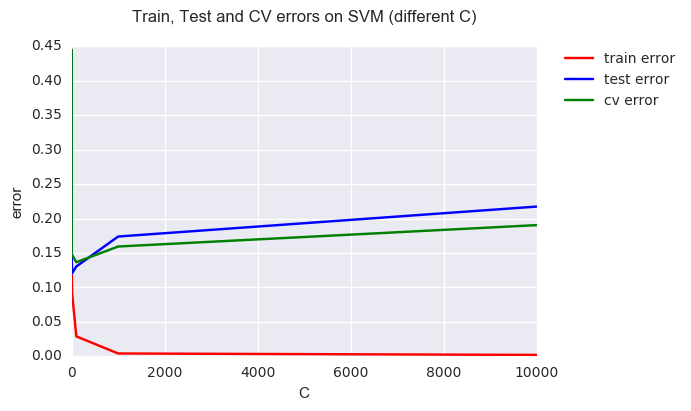

In [650]:
err_train = list()
err_test = list()
for c in Cs:
    svc = SVC(C=c)
    svc.fit(X_train, y_train)
    y_train_pred      = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))
plt.title('Train, Test and CV errors on SVM (different C)\n')
plt.plot(Cs, err_train, 'r', label = "train error")
plt.plot(Cs, err_test, 'b', label = "test error")
plt.plot(Cs, err_cv_C, 'g', label = "cv error")
plt.xlabel('С')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Явно видно переобучение 

## Изменяем параметр gamma

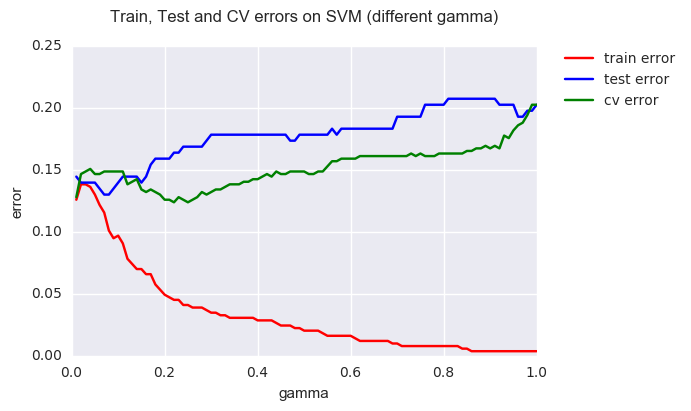

In [651]:
err_train = list()
err_test = list()
for g in gamma_array:
    svc = SVC(gamma = g)
    svc.fit(X_train, y_train)
    y_train_pred      = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))
plt.title('Train, Test and CV errors on SVM (different gamma)\n')
plt.plot(gamma_array, err_train, 'r', label = "train error")
plt.plot(gamma_array, err_test, 'b', label = "test error")
plt.plot(gamma_array, err_cv_gamma, 'g', label = "cv error")
plt.xlabel('gamma')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Явно видно переобучение при gamma>0.2

In [654]:
svc = SVC(C = best_C, gamma = best_gamma).fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)
y_predict = svc.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.00207039337474 0.173913043478
[[96 19]
 [17 75]]
0.0536231884058
[[364  19]
 [ 18 289]]


### Несмотря на относительно плохие результаты на тестовой выборке (переобучение по параметру gamma), метод опорных векторов показывает лучший результат для глобальной выборки

### Попробуем другое ядро (Linear)

In [655]:
Cs = 10.**np.arange(-4, 5)
gamma_array =  np.linspace(start=0.01, stop = 1.0, num = 50)
svc = SVC(kernel = 'linear')
grid = GridSearchCV(svc, param_grid = {'C': Cs}, cv =10)
grid.fit(X_train, y_train)
err_cv_C = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_C = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print("C READY")
print(best_cv_err_C, best_C, best_cv_err_gamma, best_gamma)

C READY
0.142857142857 0.1 0.124223602484 0.22


## Изменяем параметр С

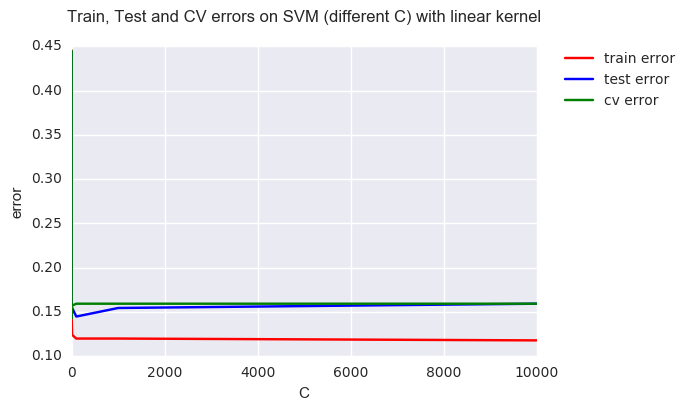

In [656]:
err_train = list()
err_test = list()
for c in Cs:
    svc = SVC(C=c, kernel = 'linear')
    svc.fit(X_train, y_train)
    y_train_pred      = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))
plt.title('Train, Test and CV errors on SVM (different C) with linear kernel\n')
plt.plot(Cs, err_train, 'r', label = "train error")
plt.plot(Cs, err_test, 'b', label = "test error")
plt.plot(Cs, err_cv_C, 'g', label = "cv error")
plt.xlabel('С')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [657]:
svc = SVC(C = best_C, gamma = best_gamma, kernel = 'linear').fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)
y_predict = svc.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.00207039337474 0.173913043478
[[96 19]
 [17 75]]
0.14347826087
[[306  77]
 [ 22 285]]


##  Вывод: результаты ухудшились (переобучение)

### Попробуем другое ядро (Poly)

In [679]:
Cs = 10.**np.arange(-4, 5)
gamma_array =  np.linspace(start=0.01, stop = 1.0, num = 50)
svc = SVC(kernel = 'poly')
grid = GridSearchCV(svc, param_grid = {'C': Cs}, cv =10)
grid.fit(X_train, y_train)
err_cv_C = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_C = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print("C READY")
grid = GridSearchCV(svc, param_grid = {'gamma': gamma_array})
grid.fit(X_train, y_train)
err_cv_gamma = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_gamma = 1 - grid.best_score_
grid.fit(X_train, y_train)
best_gamma = grid.best_estimator_.gamma
print(best_cv_err_C, best_C, best_cv_err_gamma, best_gamma)

C READY
0.144927536232 100.0 0.132505175983 0.131224489796


## Изменяем параметр С

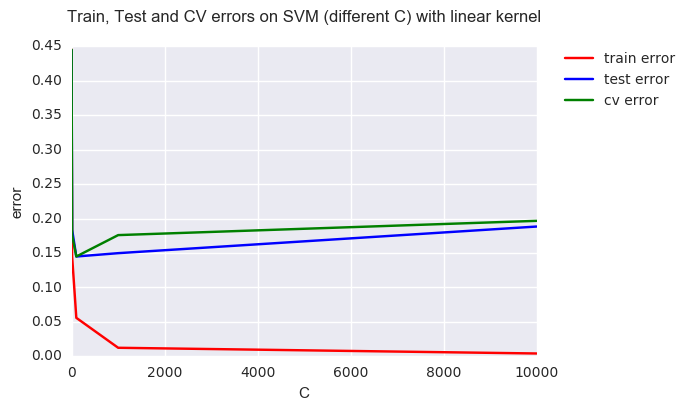

In [680]:
err_train = list()
err_test = list()
for c in Cs:
    svc = SVC(C=c, kernel = 'poly')
    svc.fit(X_train, y_train)
    y_train_pred      = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))
plt.title('Train, Test and CV errors on SVM (different C) with linear kernel\n')
plt.plot(Cs, err_train, 'r', label = "train error")
plt.plot(Cs, err_test, 'b', label = "test error")
plt.plot(Cs, err_cv_C, 'g', label = "cv error")
plt.xlabel('С')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Переобучение при большом С

## Изменяем параметр gamma

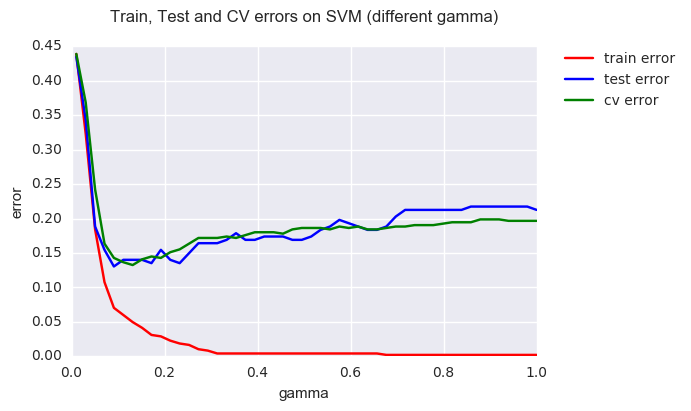

In [681]:
err_train = list()
err_test = list()
for g in gamma_array:
    svc = SVC(gamma = g, kernel = 'poly')
    svc.fit(X_train, y_train)
    y_train_pred      = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))
plt.title('Train, Test and CV errors on SVM (different gamma)\n')
plt.plot(gamma_array, err_train, 'r', label = "train error")
plt.plot(gamma_array, err_test, 'b', label = "test error")
plt.plot(gamma_array, err_cv_gamma, 'g', label = "cv error")
plt.xlabel('gamma')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [683]:
svc = SVC(C = best_C, gamma = best_gamma, kernel = 'poly').fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)
y_predict = svc.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.00414078674948 0.188405797101
[[97 18]
 [21 71]]
0.0594202898551
[[365  18]
 [ 23 284]]


## Результаты такие же, как и для ядра по умолчанию (rbf)

### Попробуем другое ядро (Sigmoid)

In [684]:
Cs = 10.**np.arange(-15, 4)
gamma_array =  np.linspace(start=0.01, stop = 1.0, num = 50)
svc = SVC(kernel = 'sigmoid')
grid = GridSearchCV(svc, param_grid = {'C': Cs}, cv =10)
grid.fit(X_train, y_train)
err_cv_C = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_C = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print("C READY")
grid = GridSearchCV(svc, param_grid = {'gamma': gamma_array})
grid.fit(X_train, y_train)
err_cv_gamma = list(map(lambda x: 1 - x[1], grid.grid_scores_))
best_cv_err_gamma = 1 - grid.best_score_
grid.fit(X_train, y_train)
best_gamma = grid.best_estimator_.gamma
print(best_cv_err_C, best_C, best_cv_err_gamma, best_gamma)

C READY
0.445134575569 1e-15 0.136645962733 0.0302040816327


## Изменяем параметр С

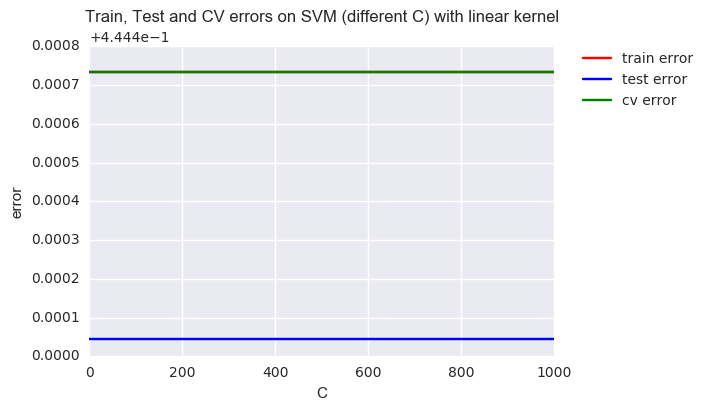

In [685]:
err_train = list()
err_test = list()
for c in Cs:
    svc = SVC(C=c, kernel = 'sigmoid')
    svc.fit(X_train, y_train)
    y_train_pred      = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))
plt.title('Train, Test and CV errors on SVM (different C) with linear kernel\n')
plt.plot(Cs, err_train, 'r', label = "train error")
plt.plot(Cs, err_test, 'b', label = "test error")
plt.plot(Cs, err_cv_C, 'g', label = "cv error")
plt.xlabel('С')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Изменяем параметр gamma

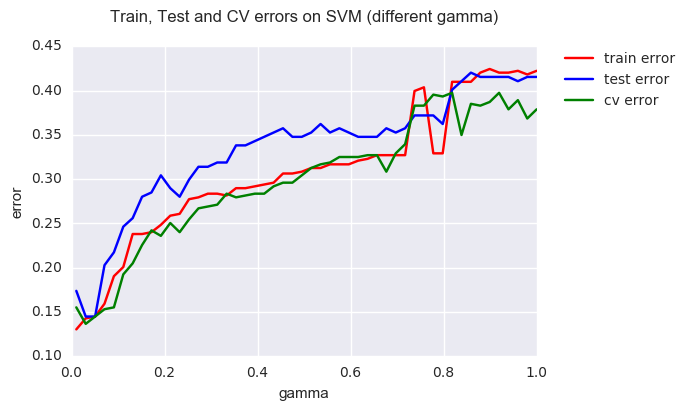

In [686]:
err_train = list()
err_test = list()
for g in gamma_array:
    svc = SVC(gamma = g, kernel = 'sigmoid')
    svc.fit(X_train, y_train)
    y_train_pred      = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))
plt.title('Train, Test and CV errors on SVM (different gamma)\n')
plt.plot(gamma_array, err_train, 'r', label = "train error")
plt.plot(gamma_array, err_test, 'b', label = "test error")
plt.plot(gamma_array, err_cv_gamma, 'g', label = "cv error")
plt.xlabel('gamma')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [687]:
svc = SVC(gamma = best_gamma, kernel = 'sigmoid').fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)
y_predict = svc.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.142857142857 0.144927536232
[[92 23]
 [ 7 85]]
0.14347826087
[[306  77]
 [ 22 285]]


### Вывод: результаты ухудшились

# Naive Bayes

# GaussianNB

In [688]:
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings("always")
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
err_train = np.mean(y_train != gnb_model.predict(X_train))
err_test  = np.mean(y_test  != gnb_model.predict(X_test))

print(err_train, err_test)

0.27950310559 0.275362318841


### Метод плохо работает для данной задачи

In [689]:
gnb_model.class_count_

array([ 268.,  215.])

# BernoulliNB

In [690]:
from sklearn.naive_bayes import BernoulliNB
bnb_model = BernoulliNB(class_prior= list([0.55486542,  0.44513458]))
bnb_model.fit(X_train, y_train)
y_train_predict = bnb_model.predict(X_train)
y_test_predict = bnb_model.predict(X_test)
y_predict = bnb_model.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.134575569358 0.164251207729
[[104  11]
 [ 23  69]]
0.14347826087
[[345  38]
 [ 61 246]]


### Метод показал относительно плохие результаты до подбора параметров (при использовании частот в качестве априорных вероятностей)

In [691]:
prior1 = np.linspace(start=0.01, stop = 1.0, num = 100)
prior = list(map(lambda x: [x, 1-x], prior1))
grid = GridSearchCV(bnb_model, param_grid = {'class_prior': prior}, cv=10)
grid.fit(X_train, y_train)
best_cv_err = 1 - grid.best_score_
best_prior = grid.best_estimator_.class_prior
print(best_cv_err, best_prior)
err_cv = list(map(lambda x: 1 - x[1], grid.grid_scores_))

0.140786749482 [0.62, 0.38]


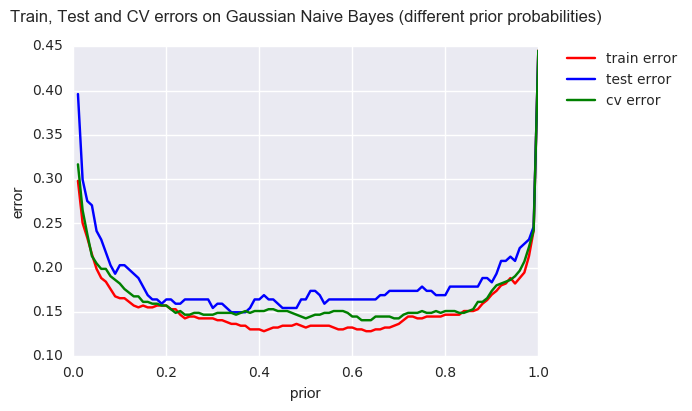

In [692]:
err_train = list()
err_test = list()
for c in prior:
    bnb_model = BernoulliNB(class_prior=c)
    bnb_model.fit(X_train, y_train)
    y_train_pred      = bnb_model.predict(X_train)
    y_test_pred = bnb_model.predict(X_test)
    err_train.append(np.mean(y_train != y_train_pred))
    err_test.append(np.mean(y_test != y_test_pred))

plt.title('Train, Test and CV errors on Gaussian Naive Bayes (different prior probabilities)\n')
plt.plot(prior1, err_train, 'r', label = "train error")
plt.plot(prior1, err_test, 'b', label = "test error")
plt.plot(prior1, err_cv, 'g', label = "cv error")
plt.xlabel('prior')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [696]:
from sklearn.naive_bayes import BernoulliNB
bnb_model = BernoulliNB(class_prior= best_prior)
bnb_model.fit(X_train, y_train)

y_train_predict = bnb_model.predict(X_train)
y_test_predict = bnb_model.predict(X_test)
y_predict = bnb_model.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.130434782609 0.164251207729
[[104  11]
 [ 23  69]]
0.140579710145
[[349  34]
 [ 63 244]]


## Метод относительно плохо работает на тестовой выборке

# Random Forest

In [698]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)

y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)
y_predict = rf.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.0 0.154589371981
[[103  12]
 [ 20  72]]
0.0463768115942
[[371  12]
 [ 20 287]]


### Значимость признаков

In [699]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

[3, 234, 7, 4, 3, 32]

In [700]:
np.sum(rf.feature_importances_)

1.0

In [701]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature '   A8' (0.262470)
 2. feature '  A10' (0.117780)
 3. feature '   A7' (0.086276)
 4. feature '   A2' (0.075718)
 5. feature '   A3' (0.075096)
 6. feature '  A14' (0.072692)
 7. feature '  A13' (0.065849)
 8. feature '   A9' (0.058993)
 9. feature '  A11' (0.013080)
10. feature ' A6_8' (0.012827)
11. feature '   A1' (0.012295)
12. feature ' A4_1' (0.010310)
13. feature ' A4_2' (0.010291)
14. feature ' A6_4' (0.010010)
15. feature ' A5_8' (0.009634)
16. feature ' A5_9' (0.009219)
17. feature ' A5_1' (0.008089)
18. feature ' A6_1' (0.007798)
19. feature 'A5_13' (0.007630)
20. feature ' A5_4' (0.007268)
21. feature 'A12_2' (0.007181)
22. feature 'A5_11' (0.006970)
23. feature ' A5_3' (0.006784)
24. feature 'A5_14' (0.006624)
25. feature ' A5_6' (0.006231)
26. feature 'A12_1' (0.005991)
27. feature ' A6_5' (0.005351)
28. feature ' A5_7' (0.003959)
29. feature 'A5_10' (0.003237)
30. feature ' A6_7' (0.002706)
31. feature ' A5_2' (0.002608)
32. feature ' A6_3' (0

In [704]:
feature_names[[0, 1, 2, 3 ,4]]

Index(['A2', 'A3', 'A7', 'A10', 'A13'], dtype='object')

(-1, 20)

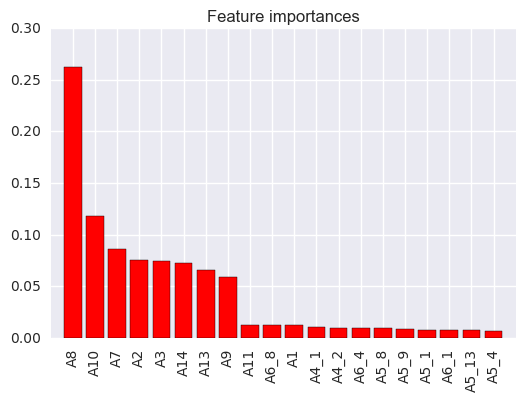

In [705]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

## Как уже было сказано, параметр А8 оказывает наибольшее влияние на выбор класса

# Extremely Randomized Trees

In [707]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 1000).fit(X_train, y_train)
y_train_predict = ert.predict(X_train)
y_test_predict = ert.predict(X_test)
y_predict = ert.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.0 0.135265700483
[[102  13]
 [ 15  77]]
0.0405797101449
[[370  13]
 [ 15 292]]


# AdaBoost

In [708]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)
y_train_predict = ada.predict(X_train)
y_test_predict = ada.predict(X_test)
y_predict = ada.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.0 0.222222222222
[[91 24]
 [22 70]]
0.0666666666667
[[359  24]
 [ 22 285]]


# GBT

In [709]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

y_train_predict = gbt.predict(X_train)
y_test_predict = gbt.predict(X_test)
y_predict = gbt.predict(X)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
err_ = np.mean(y  != y_predict)
print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))
print(err_)
print(confusion_matrix(y, y_predict))

0.0 0.183574879227
[[101  14]
 [ 24  68]]
0.0550724637681
[[369  14]
 [ 24 283]]


# Вывод: для методов RandomForest, Extremely Randomized Trees, AdaBoost, GBT характерно переобучение, однако все они показывают отличные результаты на глобальной выборке. Наилучший результат у метода Extremely Randomized Trees. Для возможного улучшения результатов классификации был бы полезен подбор параметров (n_estimators), а также использование только наиболее важных признаков: A8, A10, A7, A2, A3, A14, A13, A9
